<h1 style="text-align:center;">Computational Intelligence</h1>
<h2 style="text-align:center;">Clustering</h2>
<h4 style="text-align:center;">by H. Naderan</h4>
<h5 style="text-align:center;">
Mechanical Engineering Department<br>
Amirkabir University of Technology
</h5>

***

### Loading libraries

In [1]:
import numpy as np
from sklearn import datasets

### Generate datasets

In [2]:
nSamples = 500
seed = 30
noisyCircles = datasets.make_circles(
    n_samples = nSamples, factor = 0.5, noise = 0.05, random_state = seed
)
noisyMoons = datasets.make_moons(n_samples = nSamples, noise = 0.05, random_state = seed)
blobs = datasets.make_blobs(n_samples = nSamples, random_state = seed)
rng = np.random.RandomState(seed)
noStructure = rng.rand(nSamples, 2), np.zeros(nSamples, np.int8)

# Anisotropicly distributed data
randomState = 170
X, y = datasets.make_blobs(n_samples = nSamples, random_state = randomState)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
Xaniso = np.dot(X, transformation)
aniso = (Xaniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=nSamples, cluster_std = [1.0, 2.5, 0.5], random_state = randomState
)

### Plotting datasets

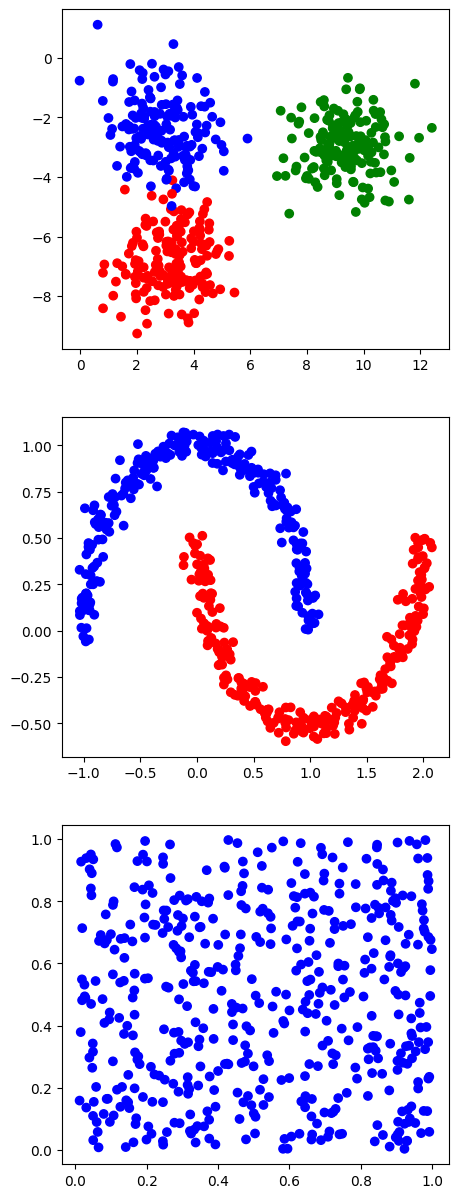

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1, figsize = (5, 15))
color = np.array(["blue", "red", "green"])
for (i, dataset) in enumerate([blobs, noisyMoons, noStructure]):
    ax[i].scatter(dataset[0][:, 0], dataset[0][:, 1], c=color[dataset[1]])


### Preprocessing

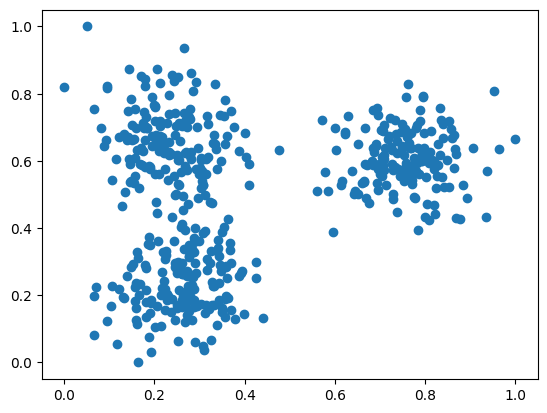

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
dataset = blobs
X, y = dataset
X = MinMaxScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])

### Clustering
**Within-Cluster Sum of Squares (WCSS)** metric

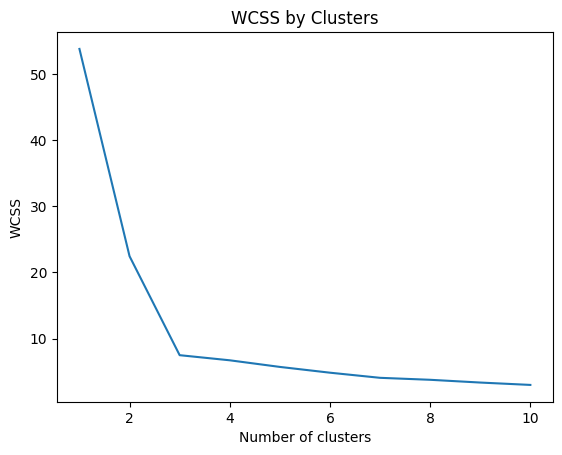

In [31]:
from sklearn.cluster import KMeans

wcss = []
model = []
for i in range(1, 11):
    model.append(KMeans(n_clusters = i).fit(X))
    # Get the WCSS (inertia) value
    wcss.append(model[i - 1].inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

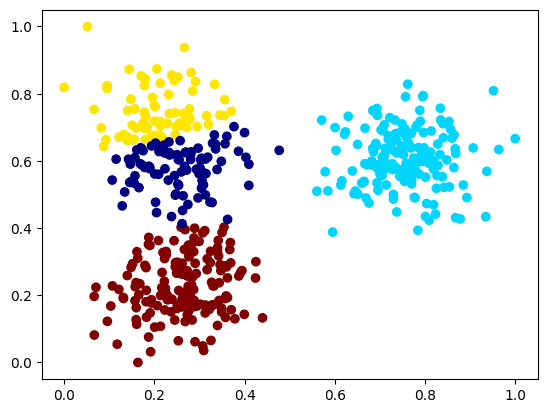

In [32]:
yp = model[3].fit_predict(X)
cmap = plt.cm.jet
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = yp, cmap = cmap)

In [33]:
yp

array([0, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 1, 1, 3, 0, 3, 1, 1, 1, 3, 2, 3,
       1, 3, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 3, 3, 2, 1, 0, 1, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 3, 1, 3, 2, 2, 2,
       1, 3, 0, 3, 3, 2, 3, 1, 1, 1, 2, 3, 2, 3, 1, 3, 0, 2, 1, 0, 1, 0,
       1, 0, 3, 0, 1, 3, 1, 1, 1, 2, 1, 0, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1,
       1, 3, 0, 1, 3, 1, 0, 0, 3, 2, 2, 3, 3, 3, 0, 2, 2, 1, 1, 3, 3, 1,
       3, 1, 3, 0, 2, 3, 1, 2, 1, 1, 0, 3, 3, 2, 1, 1, 3, 3, 1, 2, 1, 2,
       0, 2, 2, 2, 1, 1, 3, 1, 1, 3, 3, 3, 1, 0, 1, 1, 3, 0, 0, 0, 3, 0,
       3, 2, 2, 3, 2, 3, 2, 1, 3, 0, 3, 2, 0, 2, 2, 0, 1, 3, 3, 0, 3, 2,
       3, 0, 3, 3, 3, 2, 1, 0, 3, 3, 3, 2, 0, 1, 3, 1, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 1, 3, 0, 1, 1, 2, 3, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3, 2,
       1, 2, 0, 1, 1, 1, 2, 0, 3, 0, 3, 3, 3, 0, 3, 1, 1, 1, 3, 3, 3, 2,
       1, 1, 1, 3, 3, 1, 0, 1, 3, 3, 0, 3, 3, 3, 3, 0, 2, 1, 1, 3, 3, 0,
       1, 2, 2, 3, 1, 1, 1, 0, 3, 3, 0, 1, 1, 1, 1,

### DBSCAN
**Density-Based Spatial Clustering Applications with Noise**

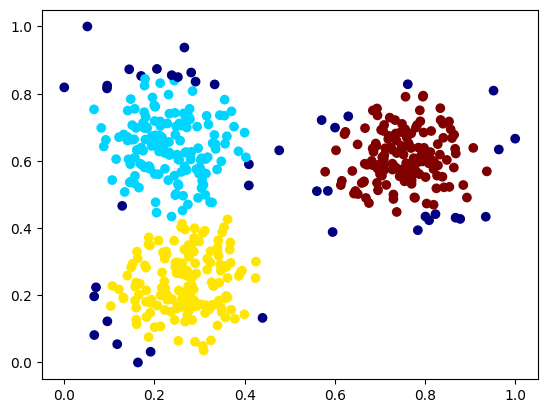

In [40]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.1, min_samples = 50)
yp = model.fit_predict(X)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = yp + 1, cmap = cmap)

In [35]:
yp

array([ 1, -1,  0,  1,  2,  1,  2,  1,  0,  2,  0,  0,  0,  2,  1,  2,  0,
        0,  0,  2,  1, -1,  0,  2,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        2,  2,  1,  0,  1,  0,  0,  2,  2,  2, -1,  2, -1,  2,  0,  0,  0,
        2,  0,  0,  2,  2, -1,  2,  2,  3,  2,  0,  2, -1,  1,  1, -1,  2,
        1,  2,  2,  1,  2,  0,  0, -1,  1,  2,  1,  2,  0,  2,  1,  1,  0,
        1,  0,  1, -1, -1,  2,  1,  0,  2,  0, -1,  0, -1,  0,  1,  2,  2,
        0,  0,  2,  2,  0,  0,  2,  0, -1,  2,  2,  0,  2,  0,  1,  1,  2,
        1,  1,  2,  2,  2,  1,  1,  1,  3,  0,  2,  2,  0,  2,  0,  2,  1,
        1,  2,  0, -1,  0, -1,  1,  2,  2,  1,  0,  0, -1,  2,  0,  1,  0,
        1, -1, -1, -1,  1,  3, -1,  2,  0,  0,  4,  2,  2,  0,  1,  0,  0,
        2,  1,  1,  1,  2,  1,  2,  1,  1,  2, -1,  2,  1,  0,  2,  1,  2,
        1,  1,  1,  1,  1,  0,  2, -1, -1,  2,  1,  2, -1,  2, -1,  2, -1,
        0,  1,  2,  2,  2,  1,  1,  0,  2,  3,  1,  1,  0,  1,  2,  0,  1,
        2,  0,  0,  2,  1